# Imports

In [2]:
import numpy as np
import corner
import os
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from astropy.table import Table

import model_flux_ratio as mfr

# MCMC run results

## Read in 

In [81]:
ndim = 8
onevar = -1

nwalkers = 500
nmbr = 1000
burnin = int(0.8*nmbr) #int(0.1*nmbr)

chains = np.load('/Users/thsyu/Software/Yp/test_data/optical/ours_base/Mrk209_500walkers_1000steps.npy')
samples = chains[:, burnin:, :].reshape((-1, ndim))

#nir_chains = np.load('test_MCMC_EWdist_cont_500walkers_1000steps.npy')
#nir_samples = nir_chains[:, burnin:, :].reshape((-1, ndim))

## Input parameters vs Best MCMC parameters

In [82]:
prenams = ['y+', 'temperature', '$log(n_{e})$', 'c(H\\beta)', '$a_{H}$', '$a_{He}$', '$\\tau_{He}', '$log(\\xi)$'] #'$n_{HI}$']
input_vals = np.array([0.08, 18000, 2, 0.1, 1.0, 1.0, 1.0, -4]) #test_MCMC
#input_vals = np.array([0.0837, 17100, 0, 0.1, 0.94, 0.50, 0.0, -6]) #Leo P w/out HeI 5015
#input_vals = np.array([0.0837, 17200, 0, 0.1, 1.02, 0.45, 0.0, -6]) #Leo P w/HeI 5015
#input_vals = np.array([0.08634, 12979, 1.987, 0.15, 2.31, 0.37, 2.27, -1.767]) # AOS 2015's solved parameters for Mrk450 No.1

print ('Best parameter values:')
#y_plus_mcmc, temp_mcmc, dens_mcmc, c_Hb_mcmc, a_H_mcmc, a_He_mcmc, tau_He_mcmc, n_HI_mcmc = map(
#    lambda v: (v[1], v[2] - v[1], v[1] - v[0]), zip(*np.percentile(samples, [16, 50, 84], axis=0)))
y_plus_mcmc, temp_mcmc, log_dens_mcmc, c_Hb_mcmc, a_H_mcmc, a_He_mcmc, tau_He_mcmc, log_xi_mcmc = map(
    lambda v: (v[1], v[2] - v[1], v[1] - v[0]), zip(*np.percentile(samples, [16, 50, 84], axis=0)))
print ('y+', y_plus_mcmc)
print ('T', temp_mcmc)
print ('log(n_e)', log_dens_mcmc)
print ('c(Hb)', c_Hb_mcmc)
print ('a_H', a_H_mcmc)
print ('a_He', a_He_mcmc)
print ('tau_He', tau_He_mcmc)
print ('log(xi)', log_xi_mcmc)
#print ('n_HI', n_HI_mcmc)
print ('\n Input parameter values:')
print (input_vals)

Best parameter values:
y+ (0.08195539203467718, 0.001962353686850535, 0.002431611589483615)
T (16164.126384827201, 1511.564019942105, 1466.5351220625435)
log(n_e) (1.0859698709005152, 0.811973661753002, 0.7485092650283821)
c(Hb) (0.015089039136725282, 0.015733243542691566, 0.010571038108360957)
a_H (2.1243242200152173, 0.7221403627222189, 0.7265082883426552)
a_He (0.272203848747377, 0.12263647715651449, 0.11037199093282785)
tau_He (0.57568756615741, 0.5058894081966187, 0.3634510325240443)
log(xi) (-2.9239126931702017, 1.9619037232832124, 2.056589549955187)

 Input parameter values:
[ 8.0e-02  1.8e+04  2.0e+00  1.0e-01  1.0e+00  1.0e+00  1.0e+00 -4.0e+00]


## Corner plot

/Users/thsyu/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


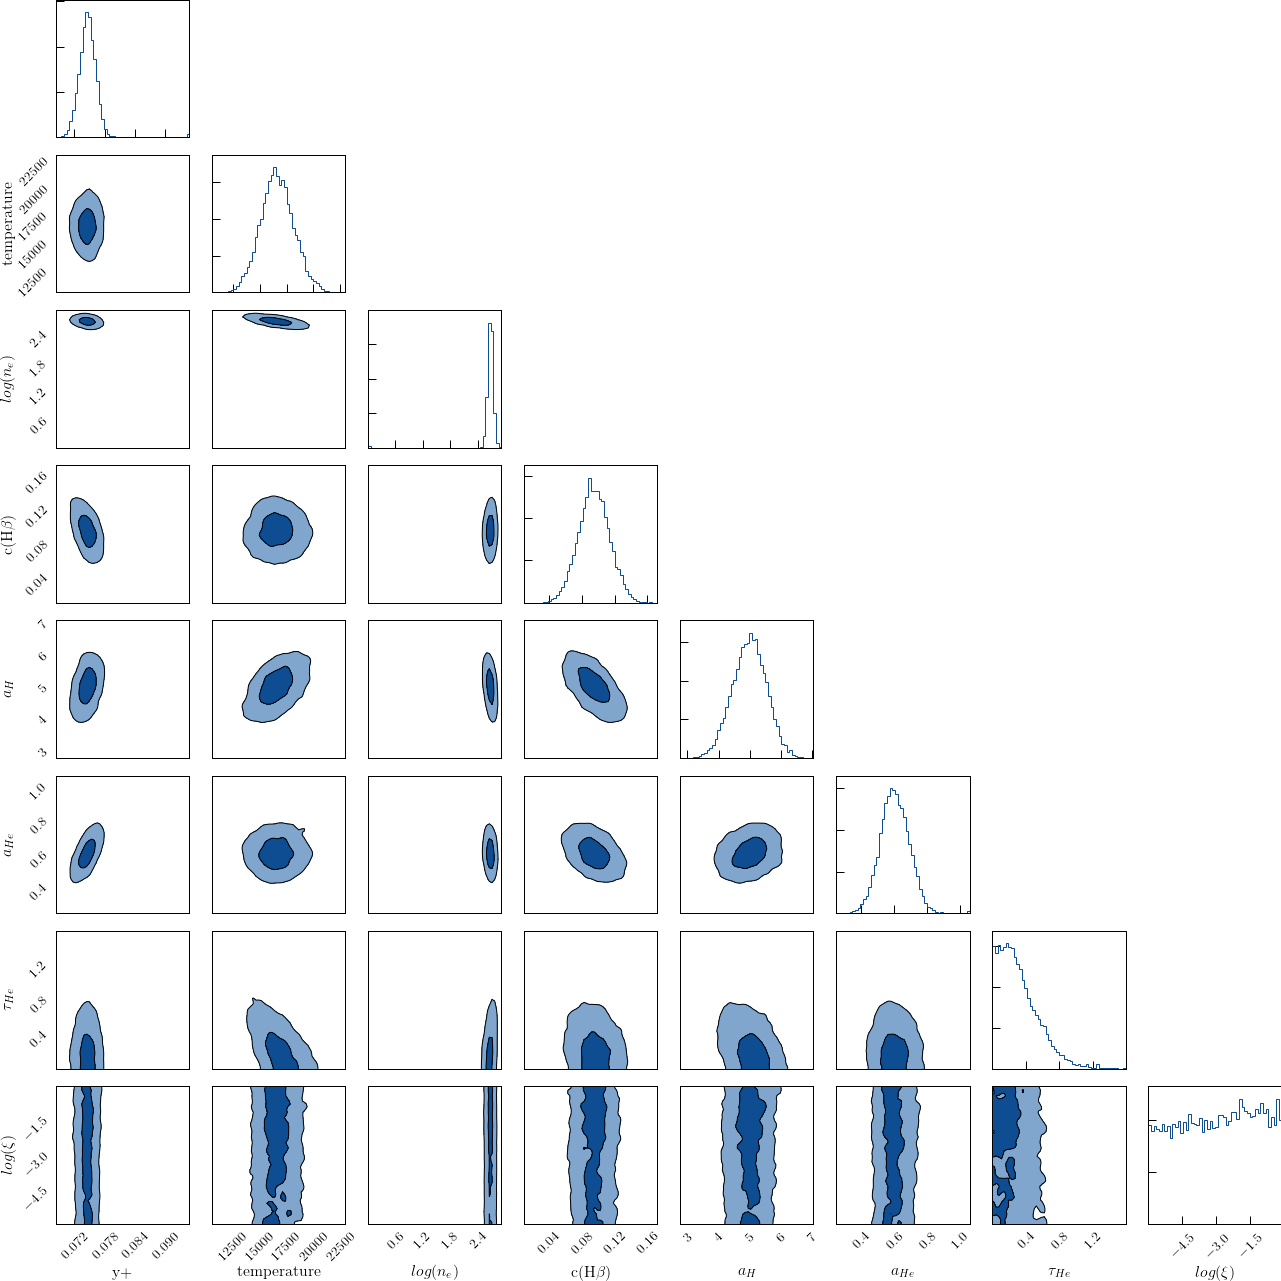

In [78]:
levels = 1.0 - np.exp(-0.5 * np.arange(1.0, 2.1, 1.0) ** 2)
contour_kwargs, contourf_kwargs = dict({}), dict({})
contour_kwargs["linewidths"] = [1.0, 1.0]
contourf_kwargs["colors"] = ((1, 1, 1), (0.502, 0.651, 0.808), (0.055, 0.302, 0.5727))
hist_kwargs = dict({})
hist_kwargs["color"] = contourf_kwargs["colors"][-1]
fig = corner.corner(samples, bins=[50, 50, 50, 50, 50, 50, 50, 50], levels=levels, plot_datapoints=False, fill_contours=True, smooth=1,
plot_density=False, contour_kwargs=contour_kwargs, contourf_kwargs=contourf_kwargs, hist_kwargs=hist_kwargs, labels=prenams)#, truths=input_vals)
#fig.savefig('{0:s}_{1:d}walkers_{2:d}steps.pdf'.format('/Users/thsyu/Software/Yp/test_nir_cornerplot', nwalkers, nmbr), overwrite=True)

/Users/thsyu/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


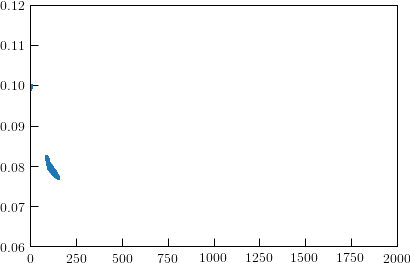

In [75]:
plt.plot(10**samples[:, 2], samples[:,0], '.')
plt.xlim(0, 2000)
plt.ylim(0.06, 0.12)
plt.show()

## Time evolution of parameters

/Users/thsyu/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


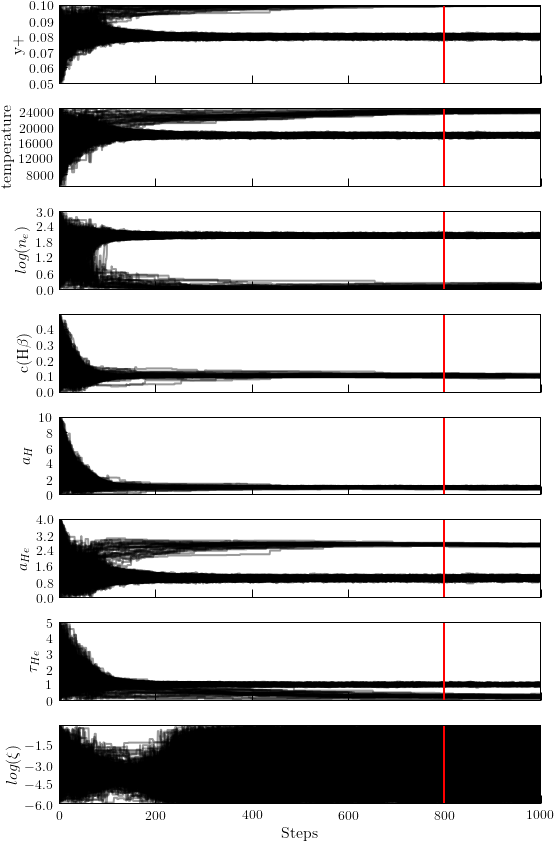

In [51]:
fig, axes = plt.subplots(ndim, 1, sharex=True, figsize=(8, 12))
for i in range(ndim):
    axes[i].plot(chains[:, :, i].T, color="k", alpha=0.4)
    axes[i].yaxis.set_major_locator(MaxNLocator(5))
    axes[i].axvline(burnin, color='red')
    axes[i].set_ylabel(prenams[i])
axes[7].set_xlabel('Steps')
fig.tight_layout(h_pad=0.0)
#fig.savefig('{0:s}_{1:d}walkers_{2:d}steps.pdf'.format('/Users/thsyu/Software/Yp/test_data/optical+nir/ours_nir_S2018_11/Mrk71No1_timeevol', nwalkers, nmbr), overwrite=True)

## Are these recovered parameters good?

In [60]:
import importlib
importlib.reload(mfr)

<module 'model_flux_ratio' from '/Users/thsyu/Software/Yp/model_flux_ratio.py'>

### Target case

#### Original input

In [13]:
targ_input = Table.read('/Users/thsyu/Software/Yp/test_data/optical+nir/Tol65_nir', format='ascii', delimiter=' ')
targ_input

Wavelength,Species,Flux Ratio,Flux Ratio Errors,EW,EW Errors
float64,str15,float64,float64,float64,float64
3890.166,hydrogen+helium,0.151,0.003,15.9,0.31589403973509933
4027.328,helium,0.009,0.001,0.9,0.10000000000000002
4102.891,hydrogen,0.221,0.003,25.7,0.34886877828054297
4341.684,hydrogen,0.443,0.007,58.1,0.918058690744921
4472.755,helium,0.033,0.001,4.7,0.14242424242424243
4862.721,hydrogen,1.0,0.01,172.8,1.7280000000000002
5877.299,helium,0.11,0.002,31.4,0.5709090909090908
6564.612,hydrogen,3.083,0.044,1078.9,15.39785922802465
6679.994,helium,0.03,0.001,10.8,0.36000000000000004


#### Generate would-be fluxes from the recovered MCMC parameters

In [57]:
mfr.generate_nir_emission_line_ratio('test_MCMCoutput', [3890.166, 4027.328, 4102.891, 4341.684, 4472.755, 4862.721, 5017.079, 5877.299, 6564.612, 6679.994, 7067.198, 10833.306], \
                             [10, 10, 75, 100, 10, 250, 5, 10, 350, 10, 5, 200], 250, 50, \
                             y_plus_mcmc[0], temp_mcmc[0], log_dens_mcmc[0], c_Hb_mcmc[0], a_H_mcmc[0], a_He_mcmc[0], tau_He_mcmc[0], log_xi_mcmc[0])

Working on  3890.166
Working on  4027.328
Working on  4102.891
Working on  4341.684
Working on  4472.755
Working on  4862.721
Working on  5017.079
Working on  5877.299
Working on  6564.612
Working on  6679.994
Working on  7067.198
Working on  10833.306


In [14]:
targ_output = Table.read('/Users/thsyu/Software/Yp/Tol', format='ascii', delimiter=' ')
targ_output

Wavelength,Species,Flux Ratio,EW
float64,str8,float64,float64
3890.166,hydrogen,0.15821461890442104,15.9
4027.328,helium,0.00884243592476276,0.9
4102.891,hydrogen,0.22086462396689402,25.7
4341.684,hydrogen,0.4365946939727905,58.1
4472.755,helium,0.03311733232861046,4.7
4862.721,hydrogen,1.0,172.8
5877.299,helium,0.11028919948358454,31.4
6564.612,hydrogen,3.0195055169258636,1078.9
6679.994,helium,0.03169716145098623,10.8


### Plot input vs output flux ratios

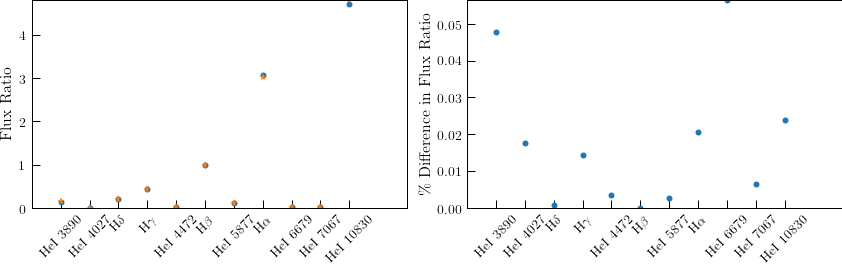

In [15]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))

ax1.plot(targ_input['Flux Ratio'][:-1], 'o', label='Measured')
ax1.plot(targ_output['Flux Ratio'], marker='*', markersize=8, linestyle='None', label='MCMC Predicted')
ax1.set_xticks(np.arange(0, len(targ_output), 1))
ax1.set_xticklabels(['HeI 3890', 'HeI 4027', r'H$\delta$', r'H$\gamma$', \
                     'HeI 4472', r'H$\beta$', 'HeI 5877', r'H$\alpha$', \
                     'HeI 6679', 'HeI 7067', 'HeI 10830'], rotation=45)
ax1.set_xlim(-1, len(targ_output)+1)
#ax1.set_ylim(-0.5, 4.0)
ax1.set_ylabel('Flux Ratio')

ax2.plot(np.abs((targ_input['Flux Ratio'][:-1]-targ_output['Flux Ratio'])/targ_input['Flux Ratio'][:-1]), 'o')
ax2.set_xticks(np.arange(0, len(targ_output), 1))
ax2.set_xticklabels(['HeI 3890', 'HeI 4027', r'H$\delta$', r'H$\gamma$', \
                     'HeI 4472', r'H$\beta$', 'HeI 5877', r'H$\alpha$', \
                     'HeI 6679', 'HeI 7067', 'HeI 10830'], rotation=45)
ax2.set_xlim(-1, len(targ_output)+1)
ax2.set_ylabel(r'\% Difference in Flux Ratio')

f.savefig('/Users/thsyu/Software/Yp/Tol.pdf', overwrite=True)
f.show()

#### Test for differences in flux components to try to identify most discrepant parts

In [46]:
mfr.generate_nir_emission_line_ratio('testHeI10830', [10833.306], [200], 250, 50, \
       y_plus_mcmc[0], temp_mcmc[0], log_dens_mcmc[0], c_Hb_mcmc[0], a_H_mcmc[0], a_He_mcmc[0], tau_He_mcmc[0], log_xi_mcmc[0])

Working on  10833.306


# Testing sensitivity of xi = n(HI)/n(HII)

In [ ]:
import os
path = os.getcwd()
hydrogen_CR_coeff = Table.read(path+'/tables/hydrogen_CR_coeff', format='ascii', delimiter='\t')

In [ ]:
# Vacuum wavelengths of Balmer lines Ha, Hb, Hg, Hd, H8 for MCMC
balmer_lines = np.array([6564.612, 4862.721, 4341.684, 4102.891, 3890.166])

# Vacuum wavelengths of Helium lines for MCMC
helium_lines = np.array([7067.198, 6679.994, 5877.299, 5017.079, 4472.755, 4027.328, 3890.151])

In [ ]:
def hydrogen_collision_to_recomb(xi, wave, temp):
    '''
    Calculate the factor that corrects the
    measured hydrogen flux for emission due
    to collisional excitation of neutral
    hydrogen

    Assumes that at these densities
    and temperatures, all neutral hydrogen is
    excited from the ground state

    Parameters
    ----------
    xi : float
        n(HI)/n(HII); ratio of neutral hydrogen
        to ionized hydrogen densities
    wave : float
        Wavelength of the Balmer line (in Angstroms)
    temp : float
        Temperature of the gas (in Kelvin)

    Returns
    -------
    hydrogen_CR : float
        Relative amount of collisional to
        recombination emission for a given
        Balmer line
        C/R(wavelength) = xi*K_eff/alpha_eff
    '''
    # Redefine the temperature
    T4 = temp / 10000.

    # Match Balmer line of interest to relevant rows in Table 3 of AOS 2010
    idx = np.where(np.abs(balmer_lines - wave) < 3)[0]

    if idx == 0:
        line = str('Ha')
    elif idx == 1:
        line = str('Hb')
    elif idx == 2:
        line = str('Hg')
    elif idx == 3:
        line = str('Hd')
    #    print ('Hydrogen C/R for', line)

    rows = np.where(line == hydrogen_CR_coeff['Line'])[0]

    # Calculate the total K_eff/alpha_eff for relevant energy levels -- collisional sum includes an infinite
    # number of levels, but probabilities fall off quickly. This sum excludes terms contributing < 1%
    Keff_alphaeff = 0.
    for i in range(1, 9): # 1-9 here is to grab the 'Term1', 'Term2', etc. column names
        a, b, c = hydrogen_CR_coeff['Term ' + str(i)][rows]
        Keff_alphaeff += (a * np.exp(b / T4) * (T4 ** c))
    #    print (Keff_alphaeff)

    # Amount of collisional to recombination emission; from Equation 6.1 of AOS 2010
    hydrogen_CR = xi * Keff_alphaeff

    return hydrogen_CR

In [ ]:
temps = np.linspace(10000, 20000, num=21)
xis = np.linspace(-6, -0.09691, num=50)

In [ ]:
collisional_to_recomb_ratio_Ha = []
collisional_to_recomb_ratio_Hg = []
collisional_to_recomb_ratio_Hd = []
collisional_to_recomb_Hbeta = []
run_temp = []
run_xi = []

for t in range(len(temps)):
    for xi in range(len(xis)):
        collisional_to_recomb_ratio_Ha.append(hydrogen_collision_to_recomb(xis[xi], balmer_lines[0], temps[t]))
        collisional_to_recomb_Hbeta.append(hydrogen_collision_to_recomb(xis[xi], balmer_lines[1], temps[t]))
        collisional_to_recomb_ratio_Hg.append(hydrogen_collision_to_recomb(xis[xi], balmer_lines[2], temps[t]))
        collisional_to_recomb_ratio_Hd.append(hydrogen_collision_to_recomb(xis[xi], balmer_lines[3], temps[t]))
        run_temp.append(temps[t])
        run_xi.append(xis[xi])

In [ ]:
Ha_term = (1 + np.array(collisional_to_recomb_ratio_Ha)) / (1 + np.array(collisional_to_recomb_Hbeta) )
Hg_term = (1 + np.array(collisional_to_recomb_ratio_Hg)) / (1 + np.array(collisional_to_recomb_Hbeta) )
Hd_term = (1 + np.array(collisional_to_recomb_ratio_Hd)) / (1 + np.array(collisional_to_recomb_Hbeta) )

In [ ]:
print (run_temp[np.argmin(Ha_term)], 10**float(run_xi[np.argmin(Ha_term)]))
print (run_temp[np.argmax(Ha_term)], 10**float(run_xi[np.argmax(Ha_term)]))

print (run_temp[np.argmin(Hg_term)], 10**float(run_xi[np.argmin(Hg_term)]))
print (run_temp[np.argmax(Hg_term)], 10**float(run_xi[np.argmax(Hg_term)]))

print (run_temp[np.argmin(Hd_term)], 10**float(run_xi[np.argmin(Hd_term)]))
print (run_temp[np.argmax(Hd_term)], 10**float(run_xi[np.argmax(Hd_term)]))

In [ ]:
plt.subplots(figsize=(10, 6))
plt.plot(Ha_term, '.', label='H-alpha')
plt.plot(Hg_term, '.', label='H-gamma')
plt.plot(Hd_term, '.', label='H-delta')
plt.title('$\\frac{1+C/R(\lambda)}{1+C/R(H\\beta)}$')
plt.legend(fontsize=16)
plt.show()

In [ ]:
collisional_to_recomb_ratio = np.array([hydrogen_collision_to_recomb(0.0, 6564, 18000), hydrogen_collision_to_recomb(0.5, 6564, 18000)\
                                        , hydrogen_collision_to_recomb(0.05, 6564, 18000), \
                                        hydrogen_collision_to_recomb(0.001, 6564, 18000)])

In [ ]:
collisional_to_recomb_Hbeta = hydrogen_collision_to_recomb(0.05, balmer_lines[1], 18000)

print (collisional_to_recomb_Hbeta)

# Testing flux equations (AOS11 Eq. 2.2, 2.3 versus Eq. 2.6, 2.7)

## Leo P, HeI 7065

In [ ]:
#Leo P's recovered parameters
xi = 10**-4
temp = 17200
dens = 1
c_Hb = 0.1
a_H = 1.02
a_He = 0.45
tau_He = 0.00
y_plus = 0.0837

EW_Hb = 183.2

emissivity_ratio = mfr.helium_emissivity_2007(7065, temp) # Using Porter 2005/2006 emissivities
a_He_at_wave = mfr.stellar_absorption(7065, a_He, ion='He')            
optical_depth_at_wave = mfr.optical_depth_function(7065, temp, dens, tau_He)            
collisional_to_recomb_ratio = mfr.helium_collision_to_recomb(7065, temp, dens)            
                    
# Here, 5 is the EW(HeI7065)
flux_EW = y_plus * emissivity_ratio * ( ( (EW_Hb + a_H)/(EW_Hb) ) / ( (5 + a_He_at_wave)/(5) ) ) * \
        optical_depth_at_wave * ( (1 + collisional_to_recomb_ratio) / (1 + collisional_to_recomb_Hbeta) ) * \
        10**-(reddening_function * c_Hb)

# Here, 0.3578125 is F(HeI7065) * EW_Hb / EW(HeI7065)
flux_cont = ( y_plus * emissivity_ratio *  optical_depth_at_wave * ( (1 + collisional_to_recomb_ratio) / (1 + collisional_to_recomb_Hbeta) ) * \
        10**-(reddening_function * c_Hb) * ( (EW_Hb + a_H)/(EW_Hb) ) ) - ( (a_He_at_wave/EW_Hb) * (0.3578125) )

# Here, 0.35596289 is F(HeI7065) * EW_Hb / EW_perturb(HeI7065)
flux_cont_perturb = ( y_plus * emissivity_ratio *  optical_depth_at_wave * ( (1 + collisional_to_recomb_ratio) / (1 + collisional_to_recomb_Hbeta) ) * \
        10**-(reddening_function * c_Hb) * ( (EW_Hb + a_H)/(EW_Hb) ) ) - ( (a_He_at_wave/EW_Hb) * (0.35596289) )

print (flux_EW, flux_cont, flux_cont_perturb)

In [ ]:
LeoP = Table.read('LeoP', format='ascii', delimiter=' ')

In [ ]:
y = np.array(LeoP['Flux Ratio'])
EWs = np.array(LeoP['EW'])
EW_errors = np.array(LeoP['EW Errors'])
#EWs = np.random.normal(EWs, EW_errors) # Perturb EW by its measured errors
EW_Hb = LeoP['EW'][np.where(LeoP['Wavelength'] == 4862.721)[0]][0]

In [ ]:
h = y * (EW_Hb / EWs) # Continuum flux; h here is h(lambda)/h(H-beta)

print (h)

In [ ]:
LeoP

In [ ]:
f_lambda_at_Hbeta = mfr.f_lambda_avg_interp(balmer_lines[1])
emissivity_ratio = mfr.hydrogen_emissivity(4341, temp, dens)
a_H_at_wave = mfr.stellar_absorption(4341, a_H, ion='H')
collisional_to_recomb_ratio = mfr.hydrogen_collision_to_recomb(xi, 4341, temp)
reddening_function = ( mfr.f_lambda_avg_interp(4341) / f_lambda_at_Hbeta ) - 1.     
                    
flux_EW = emissivity_ratio * ( ( (EW_Hb + a_H)/(EW_Hb) ) / ( (54.6 + a_H_at_wave)/(54.6) ) ) * \
        ( (1 + collisional_to_recomb_ratio) / (1 + collisional_to_recomb_Hbeta) ) * \
        10**-(reddening_function * c_Hb)

flux_cont = ( emissivity_ratio * ( (1 + collisional_to_recomb_ratio) / (1 + collisional_to_recomb_Hbeta) ) * \
         10**-(reddening_function * c_Hb) * ( (EW_Hb + a_H)/(EW_Hb) ) ) - ( (a_H_at_wave / EW_Hb) * (1.44613919) )

flux_cont_perturb = ( emissivity_ratio * ( (1 + collisional_to_recomb_ratio) / (1 + collisional_to_recomb_Hbeta) ) * \
         10**-(reddening_function * c_Hb) * ( (EW_Hb + a_H)/(EW_Hb) ) ) - ( (a_H_at_wave / EW_Hb) * (1.30736294) )

print (flux_EW, flux_cont, flux_cont_perturb)


## Test data case, H8+HeI3889

H8+HeI3889 is breaking the code right now...

In [ ]:
xi = 10**-4
temp = 18000
dens = 10**2
c_Hb = 0.1
a_H = 1.0
a_He = 1.0
tau_He = 1.0
y_plus = 0.08

EW_Hb = 250
EW_3889 = 10 # This is my input EW to generate fake fluxes
#h_3889 = 0.1609593838415738 * ( EW_Hb / EW_3889 ) # from test_output_flux
h_3889 = 0.1584595098677284 * (EW_Hb / EW_3889) # from test_output_flux_CCMred

balmer_lines = np.array([6564.612, 4862.721, 4341.684, 4102.891, 3890.166])

In [ ]:
h_3889

### Separate Equations for HeI, H8 3889

In [ ]:
collisional_to_recomb_Hbeta = mfr.hydrogen_collision_to_recomb(xi, balmer_lines[1], temp)
#f_lambda_at_Hbeta = mfr.f_lambda_avg_interp(balmer_lines[1])
AHbeta_AV = mfr.reddening_coefficient(balmer_lines[1])

# Calculate respective flux contributions
frac_of_he = 0.5
EW_HeI = frac_of_he * EW_3889
EW_H8 = (1-frac_of_he) * EW_3889

# HeI 3890.151 contribution:
line_species = 'helium'

emissivity_ratio = mfr.helium_emissivity(3890, temp, dens)
a_He_at_wave = mfr.stellar_absorption(3890, a_He, ion=line_species)
optical_depth_at_wave = mfr.optical_depth_function(3890, temp, dens, tau_He)
collisional_to_recomb_ratio = mfr.helium_collision_to_recomb(3890, temp, dens)
#reddening_function = ( mfr.f_lambda_avg_interp(3890) / f_lambda_at_Hbeta ) - 1.
reddening_function = ( mfr.reddening_coefficient(3890) / AHbeta_AV ) - 1.

he_flux_cont = ( y_plus * emissivity_ratio *  optical_depth_at_wave * ( (1 + collisional_to_recomb_ratio) / (1 + collisional_to_recomb_Hbeta) ) * \
        10**-(reddening_function * c_Hb) * ( (EW_Hb + a_H)/(EW_Hb) ) ) - ( (a_He_at_wave/EW_Hb) * (h_3889) )

he_flux_EW = y_plus * emissivity_ratio * ( ( (EW_Hb + a_H)/(EW_Hb) ) / ( (EW_HeI + a_He_at_wave)/(EW_HeI) ) ) * \
                        optical_depth_at_wave * ( (1 + collisional_to_recomb_ratio) / (1 + collisional_to_recomb_Hbeta) ) * \
                        10**-(reddening_function * c_Hb)
        
# H8 contribution:
line_species = 'hydrogen'

emissivity_ratio = mfr.hydrogen_emissivity(3890, temp, dens)
a_H_at_wave = mfr.stellar_absorption(3890, a_H, ion=line_species)
collisional_to_recomb_factor = np.exp(( -13.6 * ((1/5**2)-(1/8**2)) ) / (8.6173303e-5 * temp)) # scale factor for going from C/R(Hg) to C/R(H8)
collisional_to_recomb_ratio = collisional_to_recomb_factor * mfr.hydrogen_collision_to_recomb(xi, 4341.684, temp) # Calculate C/R(Hg) and multiply by above scale factor
#reddening_function = ( mfr.f_lambda_avg_interp(3890) / f_lambda_at_Hbeta ) - 1.
reddening_function = ( mfr.reddening_coefficient(3890) / AHbeta_AV ) - 1.

h8_flux_cont = ( emissivity_ratio * ( (1 + collisional_to_recomb_ratio) / (1 + collisional_to_recomb_Hbeta) ) * \
        10**-(reddening_function * c_Hb) * ( (EW_Hb + a_H)/(EW_Hb) ) ) - ( (a_H_at_wave / EW_Hb) * (h_3889) )

h8_flux_EW = emissivity_ratio * ( ( (EW_Hb + a_H)/(EW_Hb) ) / ( (EW_H8 + a_H_at_wave)/(EW_H8) ) ) * \
                        ( (1 + collisional_to_recomb_ratio) / (1 + collisional_to_recomb_Hbeta) ) * \
                        10**-(reddening_function * c_Hb)
        
#print (h_3889 * EW_3889 / EW_Hb)

print (he_flux_cont, h8_flux_cont, he_flux_cont+h8_flux_cont)
print (he_flux_EW, h8_flux_EW, he_flux_EW+h8_flux_EW)

In [ ]:
print (h8_flux_EW/(he_flux_EW+h8_flux_EW))

### Combining like terms in Equations for HeI, H8 flux

In [ ]:
collisional_to_recomb_Hbeta = mfr.hydrogen_collision_to_recomb(xi, balmer_lines[1], temp)
f_lambda_at_Hbeta = mfr.f_lambda_avg_interp(balmer_lines[1])

# HeI 3890.151 contribution:
he_emissivity_ratio = mfr.helium_emissivity(3890, temp, dens)
a_He_at_wave = mfr.stellar_absorption(3890, a_He, ion='helium')
optical_depth_at_wave = mfr.optical_depth_function(3890, temp, dens, tau_He)
he_collisional_to_recomb_ratio = mfr.helium_collision_to_recomb(3890, temp, dens)
reddening_function = ( mfr.f_lambda_avg_interp(3890) / f_lambda_at_Hbeta ) - 1.

# H8 contribution:
h_emissivity_ratio = mfr.hydrogen_emissivity(3890, temp, dens)
a_H_at_wave = mfr.stellar_absorption(3890, a_H, ion='hydrogen')
collisional_to_recomb_factor = np.exp(( -13.6 * ((1/5**2)-(1/8**2)) ) / (8.6173303e-5 * temp)) # scale factor for going from C/R(Hg) to C/R(H8)
h_collisional_to_recomb_ratio = collisional_to_recomb_factor * mfr.hydrogen_collision_to_recomb(xi, 4341.684, temp) # Calculate C/R(Hg) and multiply by above scale factor

# Flux:
he_flux_EW = y_plus * he_emissivity_ratio * ( ( (EW_Hb + a_H)/(EW_Hb) ) / ( (EW_3889 + a_He_at_wave)/(EW_3889) ) ) * \
                        optical_depth_at_wave * ( (1 + he_collisional_to_recomb_ratio) / (1 + collisional_to_recomb_Hbeta) ) * \
                        10**-(reddening_function * c_Hb)
        
h8_flux_EW = h_emissivity_ratio * ( ( (EW_Hb + a_H)/(EW_Hb) ) / ( (EW_3889 + a_H_at_wave)/(EW_3889) ) ) * \
                        ( (1 + h_collisional_to_recomb_ratio) / (1 + collisional_to_recomb_Hbeta) ) * \
                        10**-(reddening_function * c_Hb)
        
flux_cont = ( ( ( 1/(1 + collisional_to_recomb_Hbeta) ) * 10**-(reddening_function * c_Hb) * ( (EW_Hb + a_H)/ EW_Hb ) ) * \
                ( (y_plus * he_emissivity_ratio * optical_depth_at_wave * (1 + he_collisional_to_recomb_ratio) ) + ( h_emissivity_ratio * (1 + h_collisional_to_recomb_ratio) ) ) ) - \
                ( (h_3889 / EW_Hb) * (a_He_at_wave + a_H_at_wave) )
        
#print (h_3889 * EW_3889 / EW_Hb)

#print (he_flux_cont, h8_flux_cont, he_flux_c  ont+h8_flux_cont)
print (flux_cont)
print (he_flux_EW, h8_flux_EW, he_flux_EW+h8_flux_EW)

In [ ]:
print (0.17710515091046297 - 0.15662712529491285)
print ((0.02047802561555012 + (0.17710515091046297 * (a_H_at_wave/EW_Hb))) * (EW_Hb/a_H_at_wave))
print (h_3889)

## Loop over all emission lines..! Test data case

In [ ]:
# Balmer and Helium lines of interest for MCMC
balmer_lines = np.array([6564.612, 4862.721, 4341.684, 4102.891, 3890.166]) # Ha, Hb, Hg, Hd, H8
helium_lines = np.array([7067.198, 6679.994, 5877.299, 5017.079, 4472.755, 4027.328, 3890.151])

# Wavelengths we care about for MCMC
emis_lines = np.sort(np.concatenate((balmer_lines, helium_lines)))[1:] # [1:] to remove the duplicate ~3890 wavelength

In [ ]:
# Input parameters for test data case
xi = 10**-4
temp = 18000
dens = 10**2
c_Hb = 0.1
a_H = 1.0
a_He = 1.0
tau_He = 1.0
y_plus = 0.08

In [ ]:
test_data = Table.read('/Users/thsyu/Software/Yp/test_output_flux_CCMred', format='ascii', delimiter=' ')
EWs = np.array(test_data['EW'])
EW_Hb = EWs[np.where(test_data['Wavelength'] == 4862.721)[0]][0]
h = np.array(test_data['Flux Ratio']) * EW_Hb / EWs

In [ ]:
h

In [ ]:
model_flux_EW = np.zeros(11)
model_flux_cont = np.zeros(11)

for w in range(len(emis_lines)):
    # Determine if working with hydrogen or helium line; within 3 Angstroms is arbitrary but should cover difference in vacuum vs air wavelength
    nearest_wave = emis_lines[np.where(np.abs(emis_lines - emis_lines[w]) < 3)[0]][0]
    # The above line is redundant, but allows for cases where emis_lines[w] is some other array, say waves_of_interest[w], 
    # and not exactly at the wavelengths given in the emis_lines array (which is concatenated from arrays balmer_lines and helium_lines)

    # Any Balmer line besides the blended HeI+H8 line (H8 at 3890.166)
    if nearest_wave in balmer_lines and nearest_wave != 3890.166:
        line_species = 'hydrogen'

        emissivity_ratio = mfr.hydrogen_emissivity(emis_lines[w], temp, dens)
        a_H_at_wave = mfr.stellar_absorption(emis_lines[w], a_H, ion=line_species)
        collisional_to_recomb_ratio = mfr.hydrogen_collision_to_recomb(xi, emis_lines[w], temp)
#        reddening_function = ( mfr.f_lambda_avg_interp(emis_lines[w]) / f_lambda_at_Hbeta ) - 1.
        reddening_function = ( mfr.reddening_coefficient(3890) / AHbeta_AV ) - 1.
    
        flux_EW = emissivity_ratio * ( ( (EW_Hb + a_H)/(EW_Hb) ) / ( (EWs[w] + a_H_at_wave)/(EWs[w]) ) ) * \
            ( (1 + collisional_to_recomb_ratio) / (1 + collisional_to_recomb_Hbeta) ) * \
            10**-(reddening_function * c_Hb)

        flux_cont = ( emissivity_ratio * ( (1 + collisional_to_recomb_ratio) / (1 + collisional_to_recomb_Hbeta) ) * \
            10**-(reddening_function * c_Hb) * ( (EW_Hb + a_H)/(EW_Hb) ) ) - ( (a_H_at_wave / EW_Hb) * (h[w]) )

    # Any HeI line besides the blended HeI+H8 line (HeI at 3890.151)
    elif nearest_wave in helium_lines and nearest_wave != 3890.151:
        line_species = 'helium'

        emissivity_ratio = mfr.helium_emissivity(emis_lines[w], temp, dens)
        a_He_at_wave = mfr.stellar_absorption(emis_lines[w], a_He, ion=line_species)
        optical_depth_at_wave = mfr.optical_depth_function(emis_lines[w], temp, dens, tau_He)
        collisional_to_recomb_ratio = mfr.helium_collision_to_recomb(emis_lines[w], temp, dens)
#        reddening_function = ( mfr.f_lambda_avg_interp(emis_lines[w]) / f_lamzbda_at_Hbeta ) - 1.
        reddening_function = ( mfr.reddening_coefficient(3890) / AHbeta_AV ) - 1.

        flux_EW = y_plus * emissivity_ratio * ( ( (EW_Hb + a_H)/(EW_Hb) ) / ( (EWs[w] + a_He_at_wave)/(EWs[w]) ) ) * \
            optical_depth_at_wave * ( (1 + collisional_to_recomb_ratio) / (1 + collisional_to_recomb_Hbeta) ) * \
            10**-(reddening_function * c_Hb)
            
        flux_cont = ( y_plus * emissivity_ratio *  optical_depth_at_wave * ( (1 + collisional_to_recomb_ratio) / (1 + collisional_to_recomb_Hbeta) ) * \
            10**-(reddening_function * c_Hb) * ( (EW_Hb + a_H)/(EW_Hb) ) ) - ( (a_He_at_wave/EW_Hb) * (h[w]) )

    # The blended HeI+H8 line
    elif nearest_wave == 3890.151 or nearest_wave == 3890.166:
        # Calculate fractional contribution of HeI and H8 to the blended line
        frac_of_he = 0.5
        EW_HeI = frac_of_he * EWs[w]
        EW_H8 = (1-frac_of_he) * EWs[w]
            
        reddening_function = ( mfr.reddening_coefficient(3890) / AHbeta_AV ) - 1.
        
        # HeI 3890.151 contribution:
        line_species = 'helium'

        emissivity_ratio = mfr.helium_emissivity(emis_lines[w], temp, dens)
        a_He_at_wave = mfr.stellar_absorption(emis_lines[w], a_He, ion=line_species)
        optical_depth_at_wave = mfr.optical_depth_function(emis_lines[w], temp, dens, tau_He)
        collisional_to_recomb_ratio = mfr.helium_collision_to_recomb(emis_lines[w], temp, dens)
#        reddening_function = ( mfr.f_lambda_avg_interp(emis_lines[w]) / f_lambda_at_Hbeta ) - 1.

        flux_EW = ( y_plus * emissivity_ratio *  optical_depth_at_wave * ( (1 + collisional_to_recomb_ratio) / (1 + collisional_to_recomb_Hbeta) ) * \
                10**-(reddening_function * c_Hb) * ( (EW_Hb + a_H)/(EW_Hb) ) ) - ( (a_He_at_wave/EW_Hb) * (h[w]) )

        flux_cont = y_plus * emissivity_ratio * ( ( (EW_Hb + a_H)/(EW_Hb) ) / ( (EW_HeI + a_He_at_wave)/(EW_HeI) ) ) * \
            optical_depth_at_wave * ( (1 + collisional_to_recomb_ratio) / (1 + collisional_to_recomb_Hbeta) ) * \
            10**-(reddening_function * c_Hb)

        print (flux_EW, flux_cont)
        # H8 contribution:
        line_species = 'hydrogen'

        emissivity_ratio = mfr.hydrogen_emissivity(emis_lines[w], temp, dens)
        a_H_at_wave = mfr.stellar_absorption(emis_lines[w], a_H, ion=line_species)
        collisional_to_recomb_factor = np.exp(( -13.6 * ((1/5**2)-(1/8**2)) ) / (8.6173303e-5 * temp)) # scale factor for going from C/R(Hg) to C/R(H8)
        collisional_to_recomb_ratio = collisional_to_recomb_factor * mfr.hydrogen_collision_to_recomb(xi, 4341.684, temp) # Calculate C/R(Hg) and multiply by above scale factor
#        reddening_function = ( mfr.f_lambda_avg_interp(emis_lines[w]) / f_lambda_at_Hbeta ) - 1.

        flux_EW += ( emissivity_ratio * ( (1 + collisional_to_recomb_ratio) / (1 + collisional_to_recomb_Hbeta) ) * \
            10**-(reddening_function * c_Hb) * ( (EW_Hb + a_H)/(EW_Hb) ) ) - ( (a_H_at_wave / EW_Hb) * (h[w]) )
 
        flux_cont += emissivity_ratio * ( ( (EW_Hb + a_H)/(EW_Hb) ) / ( (EW_H8 + a_H_at_wave)/(EW_H8) ) ) * \
            ( (1 + collisional_to_recomb_ratio) / (1 + collisional_to_recomb_Hbeta) ) * \
            10**-(reddening_function * c_Hb)

        print (flux_EW, flux_cont)
        
    model_flux_EW[w] = flux_EW
    model_flux_cont[w] = flux_cont

In [ ]:
plt.plot(model_flux_EW - model_flux_cont, 'o')
plt.ylim(-0.025, 0.005)
plt.show()

Confirmed that H8+HeI3889 is the only one that is discrepant..

# Can I extrapolate the SMC reddening curve for HeI10830?

In [ ]:
import scipy.interpolate as interp

f_lambda_avg = Table.read(path+'/tables/average_extinction_curve', format='ascii', delimiter=' ')
f_lambda_avg_interp = interp.interp1d(f_lambda_avg['wavelength'], f_lambda_avg['X(x)'])

In [ ]:
f_lambda_avg_interp(9000)

In [ ]:
f_lambda_avg

In [ ]:
xvals = np.linspace(3750, 9750, num=50)
xvals_extrap = np.linspace(3000, 11000, num=50)

In [ ]:
test_extrap = np.polyfit(f_lambda_avg['wavelength'], f_lambda_avg['X(x)'], deg=2)
test_extrap

In [ ]:

test_extrap = np.polyfit(f_lambda_avg['wavelength'], f_lambda_avg['X(x)'], deg=2)
test_extrap[0]*11000**2 + test_extrap[1]*11000 + test_extrap[2]

In [ ]:
plt.subplots(figsize=(10, 10))
plt.plot(f_lambda_avg['wavelength'], f_lambda_avg['X(x)'])
plt.plot(xvals, f_lambda_avg_interp(xvals))
plt.plot(xvals_extrap, test_extrap[0]*xvals_extrap**2 + test_extrap[1]*xvals_extrap + test_extrap[2])
plt.show()